In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.cm
from scipy.stats import norm

cm = plt.cm.get_cmap('Reds')
cm1 = plt.cm.get_cmap('Blues')
cm2  = plt.cm.get_cmap('Purples')
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']

In [2]:
#Figure 6: Sparsity scaling with number of background odors
N = 16
n = 4 
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
xi,yi = np.meshgrid(x,y)
xi = xi + 0.05*np.random.uniform(0,1,(N,N))
yi = yi + 0.05*np.random.uniform(0,1,(N,N))

def pattern(eta):
    return 1.0/(1.0 + (1.0/eta)**n)

def pattern_c(eta, kappa, c):
    return 1.0/(1.0 + ((1.0 + c/kappa)/(eta*c/kappa))**n)
    
def mixture(eta, kappa):
    kappa_sum = np.sum(1.0/kappa, axis = 0)
    etakappa_sum = np.sum(eta/kappa, axis = 0)
    eta_eff = etakappa_sum/kappa_sum
    return pattern(eta_eff)

def mixture_c(eta, kappa, c):
    kappa_sum = 1.0 + np.sum(c/kappa, axis = 0)
    etakappa_sum = np.sum(c*eta/kappa, axis = 0)
    return 1.0/(1.0 + (kappa_sum/etakappa_sum)**n)

b = 128
rho_all = [0.0, 0.5,1.0, 0.1,0.2,0.3]
p = 0.3
t = 1.0/(1.0 + np.exp(-n*norm.ppf(1 - p)))
lnc = 5*np.log(10)
datapavg = np.zeros((6,128))
numsam = 1000
for i,rho in enumerate(rho_all[:]):
    print(i,rho)
    for bs in np.linspace(1,b,40, dtype = int):
        avg = 0
        for j in range(numsam):
            lnkappa = np.random.randn(bs,N,N)
            lneta = np.random.randn(bs,N,N)
            lneta = rho*lnkappa + np.sqrt(1 - rho*rho)*lneta
            lnkappa = -4*lnkappa
            kappa = np.exp(lnkappa)
            eta = np.exp(lneta)
            avg += np.mean(mixture(eta,kappa) > t)
        avg /= numsam
        datapavg[i][bs-1] = avg

0 0.0
1 0.5
2 1.0
3 0.1
4 0.2
5 0.3


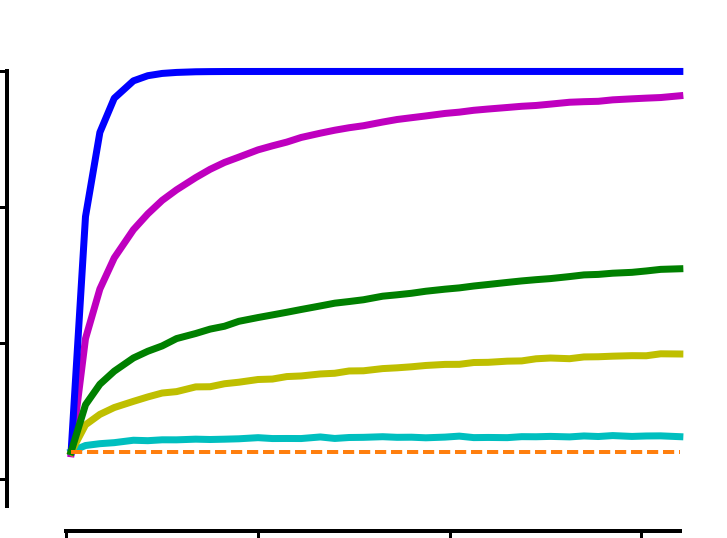

In [20]:
plt.close("all")
bs_sub = np.linspace(1,b,40, dtype = int)
fig,axis = plt.subplots(1,1,figsize = (12,9))
lw = 7
axis.plot(bs_sub,datapavg[0,bs_sub-1], 'c-', linewidth = lw)
axis.plot(bs_sub,datapavg[1,bs_sub-1], 'm-', linewidth = lw)
axis.plot(bs_sub,datapavg[2,bs_sub-1], 'b-', linewidth = lw)
axis.plot(bs_sub,datapavg[3,bs_sub-1], 'y-', linewidth = lw)
axis.plot(bs_sub,datapavg[4,bs_sub-1], 'g-', linewidth = lw)
#axis.plot(bs_sub,datapavg[5,bs_sub-1], 'C1-', linewidth = 4)
axis.plot(np.arange(1,b+1),0.3*np.ones(b), 'C1--', linewidth = 4 )
axis.set_ylim(0.2,1.1)
axis.yaxis.set_major_locator(MultipleLocator(0.25))
axis.xaxis.set_major_locator(MultipleLocator(40))

axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))

axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )


axis.spines['left'].set_bounds(0.2,1)
axis.spines['bottom'].set_bounds(0,128)
fig.savefig("fig6_sparsity_scaling.eps")
plt.show()   

In [45]:
#Figure 6: Showing the coding scheme - don't run this if you can avoid it, the curves are good as they are
N = 16
n = 4 
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
xi,yi = np.meshgrid(x,y)
xi = xi + 0.05*np.random.uniform(0,1,(N,N))
yi = yi + 0.05*np.random.uniform(0,1,(N,N))

rho = 0.5
b = 2
lnkappa = np.random.randn(b,N,N)
lneta = np.random.randn(b,N,N)
lneta = rho*lnkappa + np.sqrt(1 - rho*rho)*lneta
lnkappa = -4*lnkappa
kappa = np.exp(lnkappa)

#lneta *= 0
eta = np.exp(lneta)

p = 0.3
def pattern(eta):
    return 1.0/(1.0 + (1.0/eta)**n)

def pattern_c(eta, kappa, c):
    return 1.0/(1.0 + ((1.0 + c/kappa)/(eta*c/kappa))**n)
    
def mixture(eta, kappa):
    kappa_sum = np.sum(1.0/kappa, axis = 0)
    etakappa_sum = np.sum(eta/kappa, axis = 0)
    eta_eff = etakappa_sum/kappa_sum
    return pattern(eta_eff)

def mixture_c(eta, kappa, c):
    kappa_sum = 1.0 + np.sum(c/kappa, axis = 0)
    etakappa_sum = np.sum(c*eta/kappa, axis = 0)
    return 1.0/(1.0 + (kappa_sum/etakappa_sum)**n)



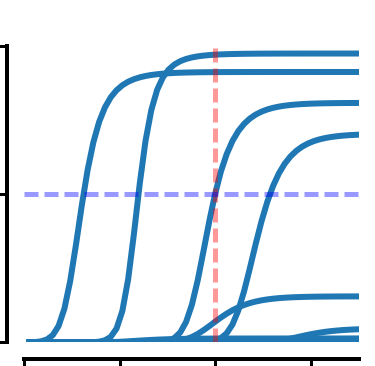

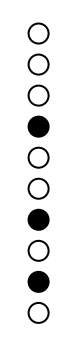

In [75]:
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
num = 100
c1 = np.logspace(-4,8,num)
c2 = 10*np.ones(num)
data= np.zeros((num,2,N,N))
datamix = np.zeros((num,N,N))
kappa[1] = np.median(kappa)*np.ones((N,N))
eta[1] = np.median(eta)*np.ones((N,N))
for i in range(num):
    c = np.array([c1[i]*np.ones((N,N)),c1[i]*np.ones((N,N))])
    data[i] = pattern_c(eta,kappa,c)
    datamix[i] = mixture_c(eta,kappa,c)
for i in range(10):
    axis.semilogx(c1/np.median(kappa[0]), data[:,0,i,0], '-', color= 'C0', linewidth = 6)
    #plt.semilogx(c1, data[:,1,i,0], 'b-')
    #plt.semilogx(2*c1, datamix[:,i,0], 'm--')
#plt.semilogx(c1, 0.5*np.ones(len(c1)), 'r--')

axis.semilogx([1,1], [0,1], 'r--', linewidth = 5,alpha = 0.4)
axis.semilogx(c1, 0.5*np.ones(len(c1)), 'b--', linewidth = 5,alpha = 0.4)
axis.set_ylim(0,1.1)
axis.set_xlim(1e-4,1e3)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.set_xticks([1e-4,1e-2,1e0,1e2])
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(0.0,1)
axis.spines['bottom'].set_bounds(1e-4,1e3)

fig.savefig("fig6_coding_scheme1.eps")
plt.show()

plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (1,6))
cm1 = plt.cm.get_cmap('Greens')
axis.scatter(xi[:10,0]*0,np.linspace(0,1,10), c = data[33,0,:10,0], linewidths = 2, s = 400,edgecolors = 'k', cmap = cm1 , vmin = 0.0, vmax =1, alpha = 1)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.set_xticks([])
axis.set_yticks([])
fig.savefig("fig6_coding_scheme2.eps")

t = 1.0/(1.0+ np.exp(-n*norm.ppf(1 - p)))
t = 0.5

plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (1,6))
axis.scatter(xi[:10,0]*0,np.linspace(0,1,10), c = data[33,0,:10,0] > t, linewidths = 2, s = 400, edgecolors = 'k', cmap = plt.cm.get_cmap('binary') , vmin = 0.0, vmax =1, alpha = 1)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.set_xticks([])
axis.set_yticks([])
fig.savefig("fig6_coding_scheme3.eps")
plt.show()

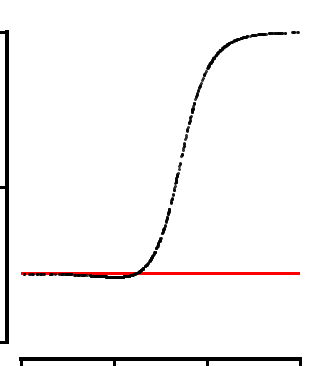

In [83]:
#Figure 6: Scatter of kappa and eta, hoping to show antagonism
N = 25
n = 4 
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
xi,yi = np.meshgrid(x,y)
xi = xi + 0.05*np.random.uniform(0,1,(N,N))
yi = yi + 0.05*np.random.uniform(0,1,(N,N))

rho = 1.0
b = 2
lnkappa = np.random.randn(b,N,N)
lneta = np.random.randn(b,N,N)
lneta = rho*lnkappa + np.sqrt(1 - rho*rho)*lneta
lnkappa = -4*lnkappa
kappa = np.exp(lnkappa)
eta = np.exp(lneta)
kappa[1] = 1*np.ones((N,N))
eta[1] = 1.0*np.ones((N,N))
c1 = np.exp(0*np.log(10))
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (5,6))
c = np.array([c1*np.ones((N,N)),c1*np.ones((N,N))])
#axis.semilogx(1.0/kappa[0],pattern_c(eta[0], kappa[0], np.exp(c[0])), 'o', color = 'b', markersize = 1.5, alpha = 1)
axis.semilogx(1.0/kappa[0],pattern_c(eta[1], kappa[1], np.exp(c[1])), 'r--', linewidth = 3, alpha = 1)
axis.semilogx(1.0/kappa[0],mixture_c(eta, kappa, np.exp(c)), 'o',color = 'k', markersize = 2, alpha = 0.7)

axis.set_xlim(1e-3,1e3)
axis.set_ylim(0,1.05)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_linewidth(4)
axis.spines['bottom'].set_linewidth(4)
axis.get_yaxis().set_ticklabels([])
axis.get_xaxis().set_ticklabels([])
axis.spines['left'].set_position(('axes', -0.05))
axis.spines['bottom'].set_position(('axes', -0.05))
axis.yaxis.set_major_locator(MultipleLocator(0.5))
axis.set_xticks([1e-3,1e-1,1e1,1e3])
axis.tick_params(which = 'major', length = 10,width = 3, direction = 'out' )
axis.tick_params(which = 'minor', length = 0, direction = 'out' )

axis.spines['left'].set_bounds(0,1)
axis.spines['bottom'].set_bounds(1e-3,1e3)
#axis.set_xlabel(r"$\kappa^{-1}$", fontsize = 32)
#fig.tight_layout()
fig.savefig("fig6_mixture_scatter_rho%d.eps" %rho)
plt.show()


In [164]:
#Figure 4 panel D: normalization glomeruli
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = ['Tahoma']
N = 14
n = 4
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
xi,yi = np.meshgrid(x,y)
xi = xi + 0.05*np.random.uniform(0,1,(N,N))
yi = yi + 0.05*np.random.uniform(0,1,(N,N))

b = 16
p = 0.3
t = 1.0/(1.0+ np.exp(-n*norm.ppf(1 - p)))
lnkappa_temp = np.random.randn(b,N,N)
lneta_temp = np.random.randn(b,N,N)

In [169]:
lneta[0] = lneta_temp[0]
rho = 1.0
lneta[1:] = rho*lnkappa_temp[1:] + np.sqrt(1 - rho*rho)*lneta_temp[1:]
lnkappa = -4*lnkappa_temp
kappa = np.exp(lnkappa)
#lneta *= 0
eta = np.exp(lneta)
cm1 = plt.cm.get_cmap('binary')

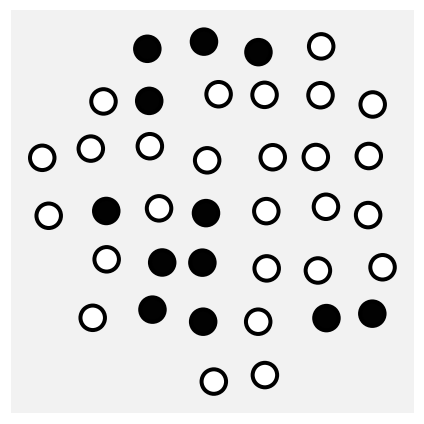

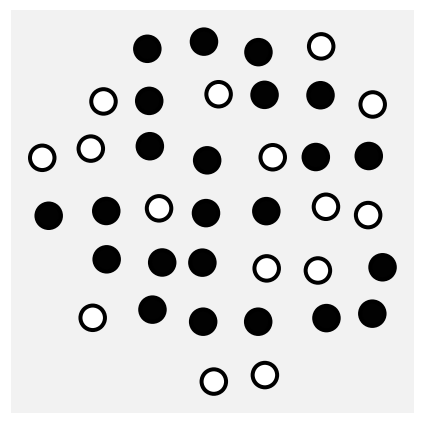

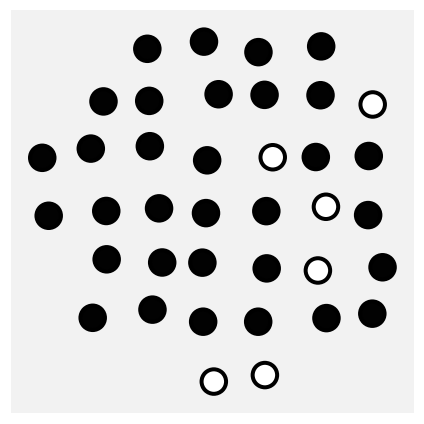

In [171]:
#Figure 4 panel D
i = 25
j = 25
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
lcs = 4*np.ones((b,N,N))
pat = pattern_c(eta[0],kappa[0],np.exp(lcs[0])) > t

circ = (xi**2 + yi**2 < 0.3)
axis.scatter(xi[circ],yi[circ], c = 0.99*pat[circ], edgecolors = 'k',linewidths = 4, s = 600, cmap = cm1 , vmin = 0.1, vmax =1, alpha = 1)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.set_xticks([])
axis.set_yticks([])
axis.set_facecolor('#f2f2f2')
fig.tight_layout()
plt.show()
fig.savefig("fig4_norm_rho%.1f_b1.eps" %rho )

mix = mixture_c(eta[0:4], kappa[0:4], np.exp(lcs[0:4])) > t
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
axis.scatter(xi[circ],yi[circ], c = 0.99*mix[circ], edgecolors = 'k',linewidths = 4, s = 600, cmap = cm1 , vmin = 0.1, vmax =1, alpha = 1)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.set_xticks([])
axis.set_yticks([])
axis.set_facecolor('#f2f2f2')
fig.tight_layout()
plt.show()
fig.savefig("fig4_norm_rho%.1f_b4.eps" %rho )

mix = mixture_c(eta[0:8], kappa[0:8], np.exp(lcs[0:8])) > t
plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (6,6))
axis.scatter(xi[circ],yi[circ], c = 0.99*mix[circ], edgecolors = 'k',linewidths = 4, s = 600, cmap = cm1 , vmin = 0.1, vmax =1, alpha = 1)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['left'].set_visible(False)
axis.spines['bottom'].set_visible(False)
axis.set_xticks([])
axis.set_yticks([])
axis.set_facecolor('#f2f2f2')
fig.tight_layout()
plt.show()
fig.savefig("fig4_norm_rho%.1f_b16.eps" %rho )